In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

# load data
data = np.load("./heart_disease_data.npz") 

def ind_x_eq_val(x, val):
    return np.where(x==val)[0]

def count_x_eq_val(x, val):
    return len(ind_x_eq_val(x, val))/float(len(x))
    
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / sig / np.sqrt(2 * np.pi)

### QUESTION (b) 
####  **Non-parametric model** Compute empirical pmf, derive the conditional pmf, and estimate the MAP decision by the mode of posterior distribution $p_{\tilde{h} \mid \tilde{s},\tilde{c}}$. (The MAP estimates should be $\tilde{h}=0 \text{ or } 1$)

In [2]:
# Estimate the pmf of H, i.e. P(H=0) and P(H=1)
P_H0 = count_x_eq_val(data['heart_disease'], 0.0)
P_H1 = count_x_eq_val(data['heart_disease'], 1.0)

# Estimate the conditional pmf of S given H, i.e. P(S|H=0) and P(S|H=1)
P_S_H0 = np.zeros(2)
P_S_H1 = np.zeros(2)

h0 = ind_x_eq_val(data['heart_disease'], 0.0)
h1 = ind_x_eq_val(data['heart_disease'], 1.0)

for ind_S in range(2):  
    P_S_H0[ind_S] = len(set(h0) & set(ind_x_eq_val(data['sex'], ind_S))) / len(h0)
    P_S_H1[ind_S] = len(set(h1) & set(ind_x_eq_val(data['sex'], ind_S))) / len(h1)    

# Estimate the conditional pmf of C given H, i.e. P(C|H=0) and P(C|H=1)
P_C_H0 = np.zeros(4)
P_C_H1 = np.zeros(4)
for ind_C in range(4):
    P_C_H0[ind_C] = len(set(h0) & set(ind_x_eq_val(data['chest_pain'], ind_C))) / len(h0)
    P_C_H1[ind_C] = len(set(h1) & set(ind_x_eq_val(data['chest_pain'], ind_C))) / len(h1) 

# Calculate the MAP estimate
MAP_estimate_S_C = []
for i in range(len(data['heart_disease_test'])):
    h1_based = P_H1 * P_S_H1[int(data['sex_test'][i])] * P_C_H1[int(data['chest_pain_test'][i])]
    h0_based = P_H0 * P_S_H0[int(data['sex_test'][i])] * P_C_H0[int(data['chest_pain_test'][i])]
    
    if h1_based < h0_based:
        MAP_estimate_S_C.append(0)
    else:
        MAP_estimate_S_C.append(1)

# Calculate the error rate - i.e. the proportion of all predictions that were incorrect
error_rate_S_C = 0

for i in range(len(data['heart_disease_test'])):
    if MAP_estimate_S_C[i] != data['heart_disease_test'][i]:
        error_rate_S_C += 1
    
error_rate_S_C /= len(data['heart_disease_test'])

print("Probability of error " + str(error_rate_S_C))

Probability of error 0.18


### QUESTION (d)
#### **Maximum likelihood estimates** Find the parameters of two normal distributions ($\tilde{x}|\tilde{h}=1$ and $\tilde{x}|\tilde{h}=0$) that maximize the likelihood functions.

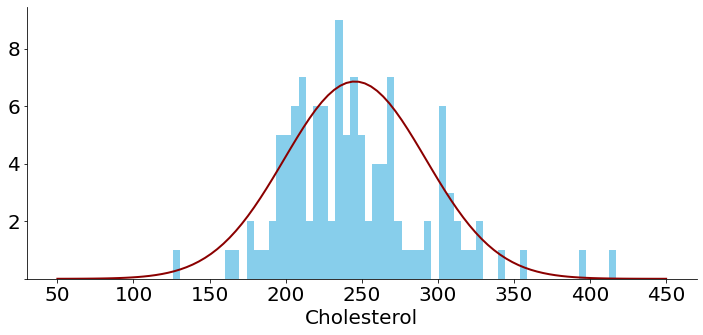

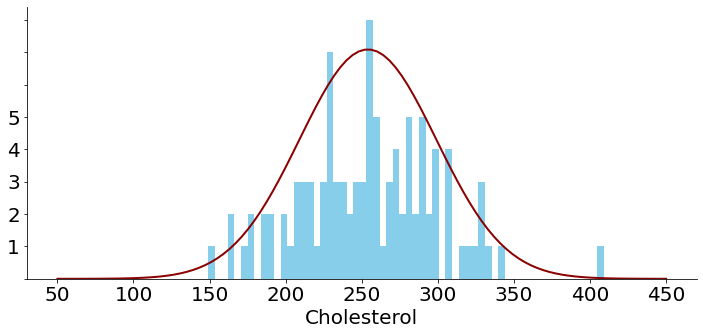

In [13]:
## Estimate MLE of X given H
mean_X_H = np.zeros(2)
std_X_H = np.zeros(2)
H = [[0 for j in range(1)] for i in range(2)]
H[0] = ind_x_eq_val(data['heart_disease'], 0.0)
H[1] = ind_x_eq_val(data['heart_disease'], 1.0)

mean_X_H[0]= np.mean(data['cholesterol'][H[0]])
std_X_H[0] = np.std(data['cholesterol'][H[0]])
mean_X_H[1]= np.mean(data['cholesterol'][H[1]])
std_X_H[1] = np.std(data['cholesterol'][H[1]])

n_plot = 100
for i in range(2):
    plt.figure(figsize=(12, 5))  
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    yticks = ax.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False) 
    plt.xticks(fontsize=20) 
    plt.yticks(fontsize=20) 
    plt.xlabel("Cholesterol", fontsize=20)  
    
    plt.hist(data['cholesterol'][H[i]],
             60, edgecolor = "none", color="skyblue")
    
    plt.plot(np.linspace(50, 450, n_plot), 800*gaussian(np.linspace(50, 450, n_plot), 
                     mean_X_H[i], std_X_H[i]), color="darkred", lw=2)

### QUESTION(e)

#### **MAP decision** compute posterior $p_{\tilde{h} \mid \tilde{s},\tilde{c}, \tilde{x}}$ and derive MAP

In [15]:
# Calculate the MAP estimate
MAP_estimate_S_C_X = []
for i in range(len(data['heart_disease_test'])):
    h1_based = P_H1 * P_S_H1[int(data['sex_test'][i])] * P_C_H1[int(data['chest_pain_test'][i])] \
               * gaussian(data['cholesterol_test'][i], mean_X_H[1], std_X_H[1])
    h0_based = P_H0 * P_S_H0[int(data['sex_test'][i])] * P_C_H0[int(data['chest_pain_test'][i])] \
               * gaussian(data['cholesterol_test'][i], mean_X_H[0], std_X_H[0])
    
    if h1_based < h0_based:
        MAP_estimate_S_C_X.append(0)
    else:
        MAP_estimate_S_C_X.append(1)
        
# Calculate the error rate
error_rate_S_C_X = 0

for i in range(len(data['heart_disease_test'])):
    if MAP_estimate_S_C_X[i] != data['heart_disease_test'][i]:
        error_rate_S_C_X += 1
    
error_rate_S_C_X /= len(data['heart_disease_test'])

print("Probability of error using cholesterol " + str(error_rate_S_C_X))

Probability of error using cholesterol 0.14
